In [1]:
import numpy as np
import matplotlib.pyplot as plt

from docplex.mp.model import Model
# from NPG_CMDP import CMDP_NPG
# from ARNPG_CMDP import CMDP_ARNPG

"""Our code customizes the CMDP code from the paper:
Natural Policy Gradient Primal-Dual Method for Constrained Markov Decision Processes, Dongsheng Ding et al.
"""

"""Natural Policy Gradient Primal-Dual Method with Softmax Parametrization
"""
from MARL import MARL_agent
# Random Seed
np.random.seed(10)
# Problem Setup
gamma = 0.8
s, a = 20, 10

In [2]:
from MARL import MARL_agent
n = 5
a = 2
s = 20

A = a**n

# Randomly generated probability transition matrix P((s,a) -> s') in [0,1]^{|S||A| x |S|}
raw_transition = np.random.uniform(0, 1, size=(s * A, s))
prob_transition = raw_transition / raw_transition.sum(axis=1, keepdims=1)
# Random positive rewards
reward = np.random.uniform(0, 1, size=(s * A))
# Random positive utilities
utility = np.random.uniform(0, 1, size=(s * A))
# Utility constraint offset b
# Start state distribution
rho = np.ones(s) / s
rewards = [reward]
temp = MARL_agent(rewards, s, a, rho, gamma, n, prob_transition)

iteration: 1
Average gap: 0.9199432865181228
iteration: 2
Average gap: 0.9609036772170692
iteration: 3
Average gap: 0.996713608243979
iteration: 4
Average gap: 1.0284904833554052
iteration: 5
Average gap: 1.0574338594646249
iteration: 6
Average gap: 1.0840556308393554
iteration: 7
Average gap: 1.1084465308379452
iteration: 8
Average gap: 1.1307195334185893
iteration: 9
Average gap: 1.1511016379704644
iteration: 10
Average gap: 1.1699005911117237


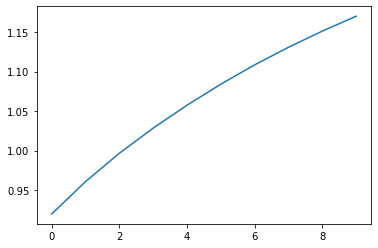

In [3]:
N = 1000
for i in range(N):
    temp.NPG_step(verbose = True)
plt.plot(temp.gap)